# Analize Decision Tree models

This notebook is responsible for taking valueble insights of the different Decision Tree models

### Import Statements

In [8]:
import pandas as pd
import os
import sys
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

p = os.path.abspath(os.path.join(os.path.dirname("__file__"), '..'))
sys.path.append(p)
from DecisionTree.ID3Tree import ID3Tree
from DecisionTree.Ruleset import Ruleset
from DecisionTree.Bootstrap_Aggregating import Bagging


In [9]:

file_path = os.path.join(p, 'datasets', 'paulo_decision_tree_data_AI_VS_AI.csv')
data = pd.read_csv(file_path, delimiter=';')
data

,ID3_Pred,Ruleset_Pred,Bagging_Pred,Actual
0,2,2,3,3
1,3,3,3,6
2,2,6,4,2
3,3,5,3,3
4,4,4,4,4
...,...,...,...,...
5999,5,2,4,4
6000,3,4,2,6
6001,4,5,4,4
6002,3,6,3,1


In [10]:
def generate_metrics(y_pred, y_true):
    """
    Generate metrics for the given predictions and true labels.
    """

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted')

    return accuracy, precision, recall, f1



In [11]:
def plot_confusion_matrix(y_pred, y_true, col):
       
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {col}')
    plt.show()
    

Metrics for ID3 Tree model:
Accuracy: 0.4610, Precision: 0.4603, Recall: 0.4610, F1 Score: 0.4605


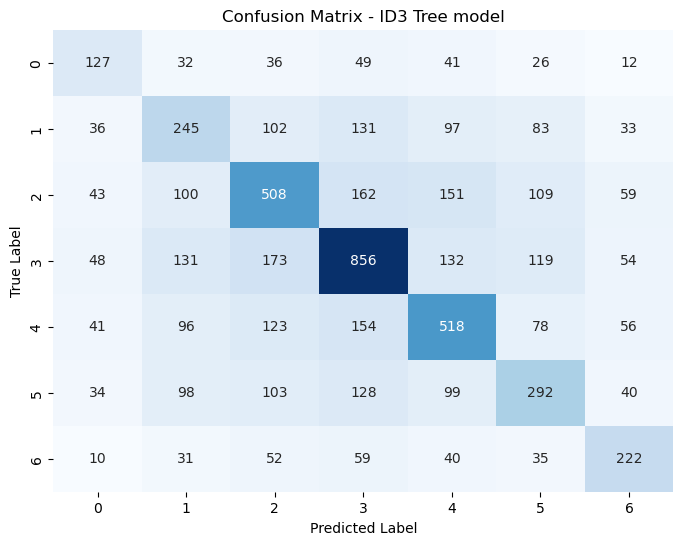

Metrics for Ruleset Tree model:
Accuracy: 0.4279, Precision: 0.4207, Recall: 0.4279, F1 Score: 0.4223


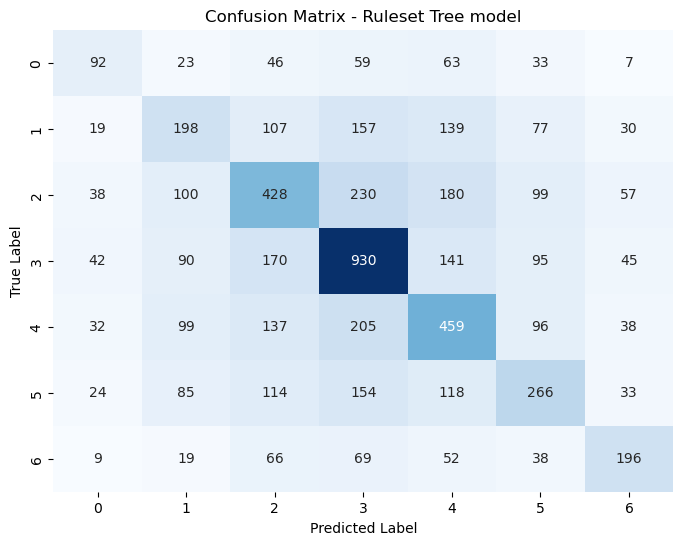

Metrics for Bagging Tree model:
Accuracy: 0.5238, Precision: 0.5488, Recall: 0.5238, F1 Score: 0.5020


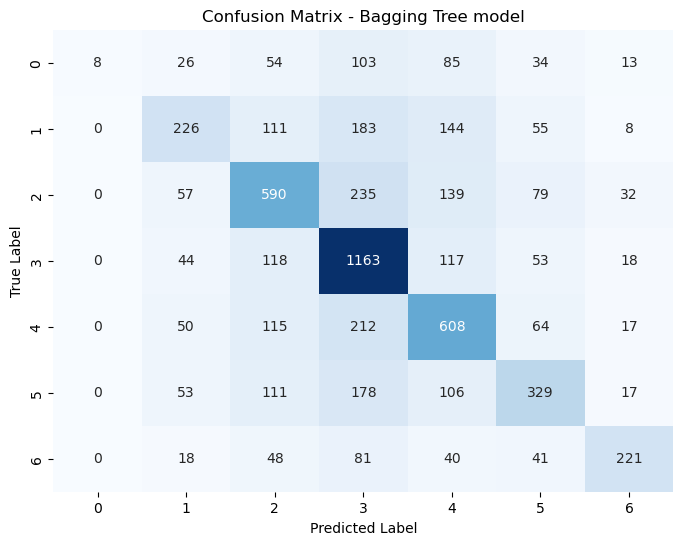

In [12]:
for col in data.columns[:-1]:
    y_pred = data[col]
    y_true = data['Actual']

    
    y_true = y_true[y_pred != -1]
    y_pred = y_pred[y_pred != -1]
   
    accuracy, precision, recall, f1 = generate_metrics(y_pred, y_true)
    print(f"Metrics for {col.split('_')[0]} Tree model:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    plot_confusion_matrix(y_pred, y_true, col.split('_')[0] + ' Tree model')

### Train Metrics

In [13]:
id3_tree = ID3Tree.load_model(os.path.join(p, 'models', 'paulo_id3_analize.pkl'))
ruleset = Ruleset.load_model(os.path.join(p, 'models', 'paulo_ruleset_analize.pkl'))
bagging = Bagging.load_model(os.path.join(p, 'models', 'paulo_bagging_analize.pkl'))

Model loaded from c:\Users\diogo\OneDrive\Documents\GitHub\MCTS_and_DecisionTree_for_ConnectFourGame\models\paulo_ruleset_analize.pkl


In [14]:

metrics = id3_tree.get_train_metrics()

print(f"Metrics for ID3 Tree model:")
print(f"Accuracy: {metrics['accuracy']:.4f}, Precision: {metrics['precision']:.4f}, Recall: {metrics['recall']:.4f}, F1 Score: {metrics['f1_score']:.4f}")

metrics = ruleset.get_train_metrics()
print(f"Metrics for Ruleset model:")
print(f"Accuracy: {metrics['accuracy']:.4f}, Precision: {metrics['precision']:.4f}, Recall: {metrics['recall']:.4f}, F1 Score: {metrics['f1_score']:.4f}")

metrics = bagging.get_train_metrics()
print(f"Metrics for Bagging model:")
print(f"Accuracy: {metrics['accuracy']:.4f}, Precision: {metrics['precision']:.4f}, Recall: {metrics['recall']:.4f}, F1 Score: {metrics['f1_score']:.4f}")


Metrics for ID3 Tree model:
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Metrics for Ruleset model:
Accuracy: 0.7031, Precision: 0.7041, Recall: 0.7031, F1 Score: 0.7010
Metrics for Bagging model:
Accuracy: 0.6563, Precision: 0.6561, Recall: 0.6563, F1 Score: 0.6540
